# Task2: MOVIE RATING PREDICTION WITH PYTHON
####  By TARANJEET KAUR
####  FEB Batch, Domain: Data Science
####  Objective: To Build a model that predicts the rating of a movie based on features like genre, director, and actors. 

# Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/Taranjeet Kaur/Downloads/IMDb Movies India.csv/IMDb_Movies_India.csv", encoding='ISO-8859-1')

In [4]:
df.head(7)

,Name,Year,Years,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997.0,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma


In [5]:
df.drop(['Years'], axis = 1, inplace = True)

In [6]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Data filtering and preprocessing

In [7]:
df.shape

(15509, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [9]:
df.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,1987.012215,5.841621
std,25.416689,1.381777
min,1913.000000,1.100000
25%,1968.000000,4.900000
50%,1991.000000,6.000000
75%,2009.000000,6.800000
max,2022.000000,10.000000


In [10]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
print("Unique Genre:", df['Genre'].unique())

Unique Genre: ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, 

In [12]:
print("Rating Distribution:", df['Rating'].value_counts())

Rating Distribution: Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64


In [13]:
df.drop_duplicates(inplace = True)
df.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [14]:
attributes = ['Year', 'Duration', 'Rating', 'Votes']
df.dropna(subset= attributes, inplace = True)
df.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [15]:
df.shape

(5851, 10)

In [16]:
df['Year']

1        2019.0
3        2019.0
5        1997.0
6        2005.0
8        2012.0
          ...  
15493    2015.0
15494    2001.0
15503    1989.0
15505    1999.0
15508    1998.0
Name: Year, Length: 5851, dtype: float64

In [17]:
df['Year'] = df['Year'].astype('int')

In [18]:
df['Year']

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5851, dtype: int32

In [19]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

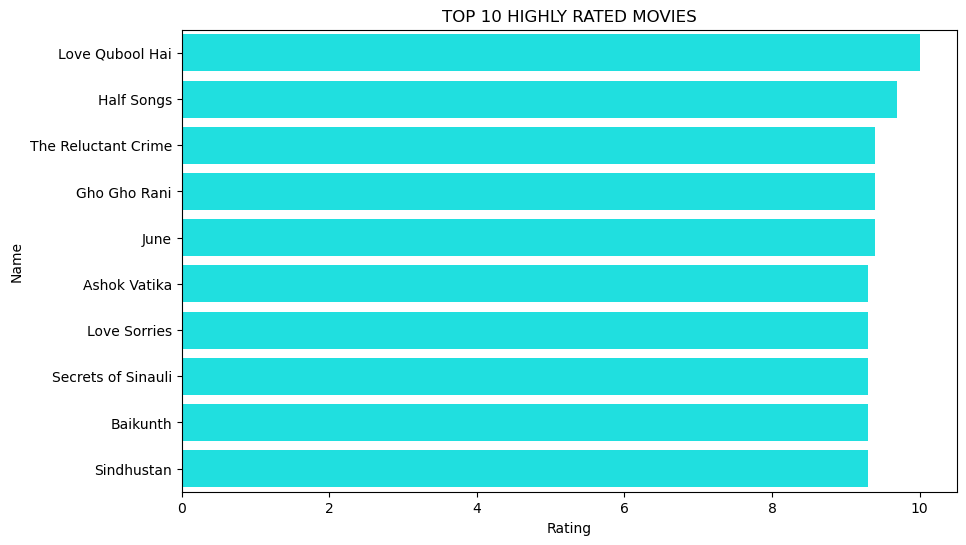

In [20]:
top_rated_movies = df.sort_values(by = 'Rating', ascending =False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x = top_rated_movies['Rating'], y= top_rated_movies['Name'], color = 'cyan' )
plt.title("TOP 10 HIGHLY RATED MOVIES")
plt.show()

In [21]:
df['Votes'] = df['Votes'].str.replace(r',', '', regex=True).astype(int)

In [22]:
df['Votes']

1           8
3          35
5         827
6        1086
8         326
         ... 
15493     408
15494    1496
15503      44
15505     655
15508      20
Name: Votes, Length: 5851, dtype: int32

In [23]:
max_voted_row = df[df['Votes'] == df['Votes'].max()]
movie_highest_votes = max_voted_row['Name'].values[0]
highest_votes = max_voted_row['Votes'].values[0]

print("Movie with the highest votes:", movie_highest_votes)
print("Number of votes:", highest_votes)
print()

min_voted_row = df[df['Votes'] == df['Votes'].min()]
movie_lowest_votes = min_voted_row['Name'].values[0]
lowest_votes = min_voted_row['Votes'].values[0]

print("Movie with the lowest votes:", movie_lowest_votes)
print("Number of votes:", lowest_votes)

Movie with the highest votes: Life of Pi
Number of votes: 591417

Movie with the lowest votes: Anmol Sitaare
Number of votes: 5


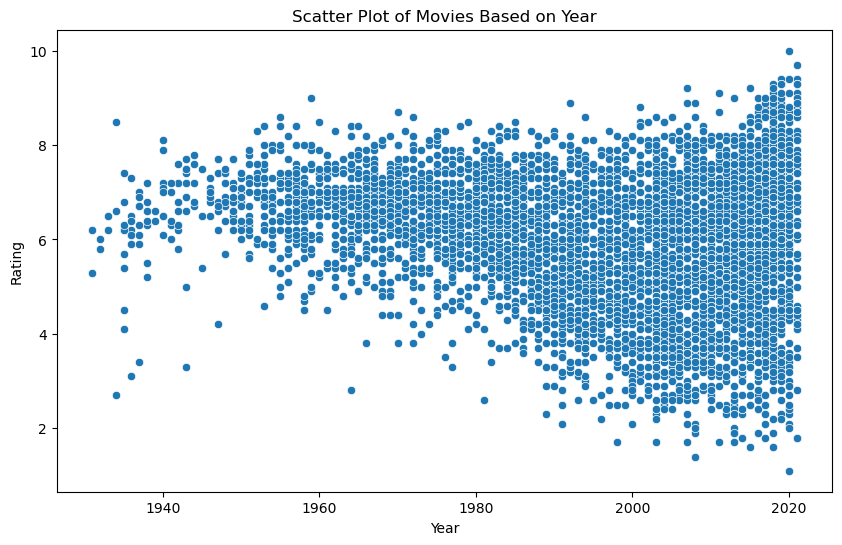

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y ='Rating', data = df)
plt.title('Scatter Plot of Movies Based on Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [25]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
actor_count = actors.value_counts().reset_index()
actor_count.columns = ['Actors', 'Number of Movies']

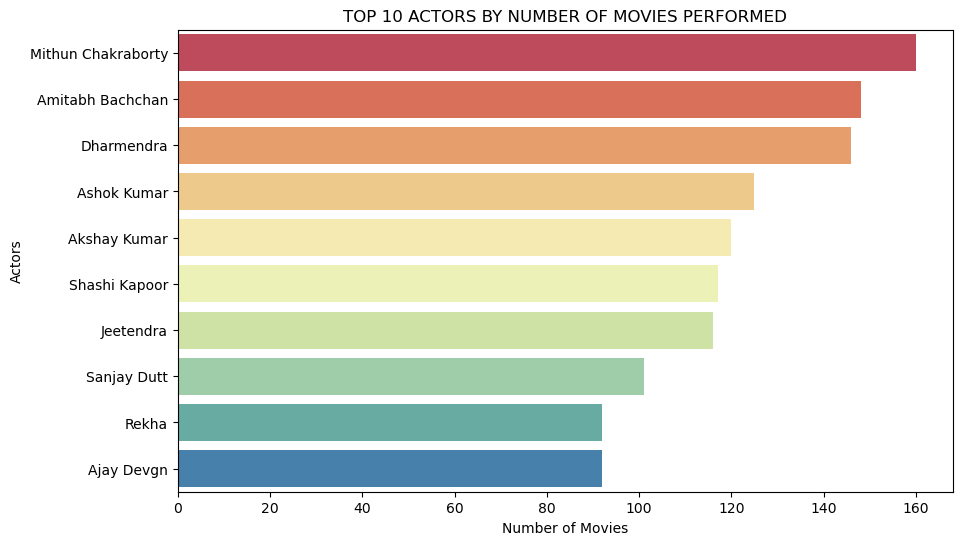

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Number of Movies', y = 'Actors', data = actor_count.head(10), palette = 'Spectral')
plt.title('TOP 10 ACTORS BY NUMBER OF MOVIES PERFORMED')
plt.show()

In [27]:
director = df['Director']
director_count = director.value_counts().reset_index()
director_count.columns = ['Director', 'Number of Movies']

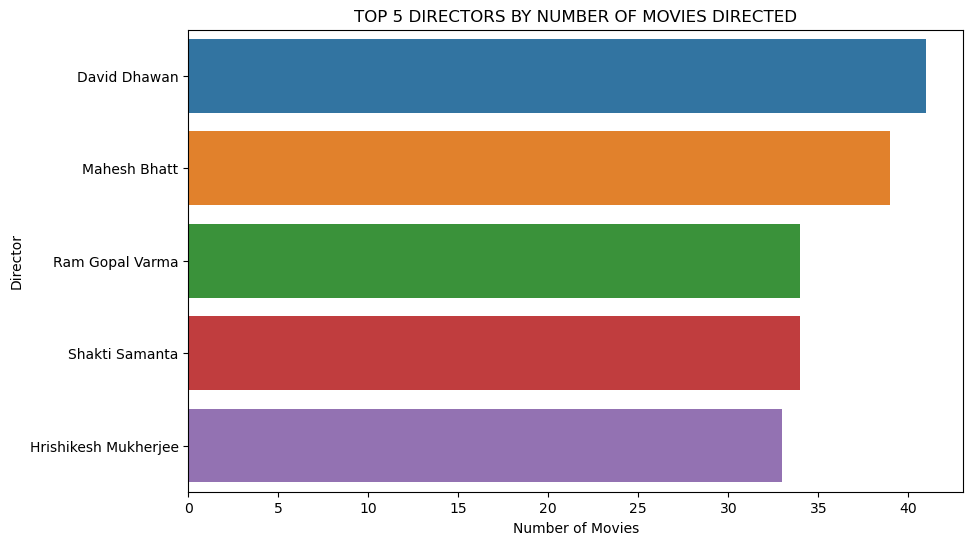

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Number of Movies', y = 'Director', data = director_count.head(5), palette = 'tab10')
plt.title('TOP 5 DIRECTORS BY NUMBER OF MOVIES DIRECTED')
plt.show()

In [29]:
df['Duration'] = df['Duration'].str.replace(r'min', '', regex=True).astype(int)

In [30]:
df['Duration']= df['Duration'].astype(float)
df['Votes']= df['Votes'].astype(float)
df['Duration'], df['Votes']

(1        109.0
 3        110.0
 5        147.0
 6        142.0
 8         82.0
          ...  
 15493    115.0
 15494    153.0
 15503    125.0
 15505    129.0
 15508    130.0
 Name: Duration, Length: 5851, dtype: float64,
 1           8.0
 3          35.0
 5         827.0
 6        1086.0
 8         326.0
           ...  
 15493     408.0
 15494    1496.0
 15503      44.0
 15505     655.0
 15508      20.0
 Name: Votes, Length: 5851, dtype: float64)

In [58]:
x = df[['Year', 'Duration', 'Votes']]
y = df['Rating']

In [59]:
#Splitting the dataset into Training Set and Test Set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [60]:
#Fitting simple linear regression to the training set

from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)

LinearRegression()

In [61]:
#Predicting the test set result

prediction = linr.predict(x_test)
print(prediction)

[6.52396189 6.70277615 5.73563457 ... 5.93026788 5.58916042 6.16590218]


In [62]:
print(y_test)

3269     7.0
14585    6.8
5279     3.3
3910     4.5
7888     2.5
        ... 
10606    7.8
15403    3.2
12072    7.2
4132     5.3
10106    4.7
Name: Rating, Length: 1951, dtype: float64


In [68]:
from sklearn import metrics
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction, squared = False)
r2 = r2_score(y_test, prediction)
print("mae: ", mae)
print("mse: ", mse)
print("r-squared score: ", r2)

mae:  1.0473127369793893
mse:  1.3569629325085377
r-squared score:  0.02431494049175753


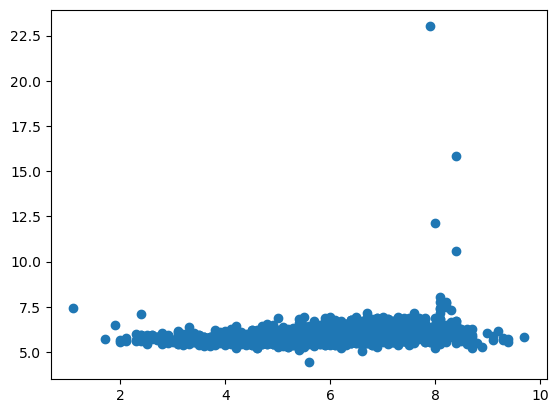

In [69]:
plt.scatter(y_test, prediction)